In [1]:
import pandas as pd
from IPython.display import display, clear_output
import os

os.getcwd()

'd:\\data_analysis_lab\\ML_100'

In [2]:
m_store = pd.read_csv("d:\\data_analysis_lab\\ML_100\\data\\m_store.csv")
m_area = pd.read_csv("d:\\data_analysis_lab\\ML_100\\data\\m_area.csv")
order_data = pd.read_csv("d:\\data_analysis_lab\\ML_100\\data\\tbl_order_202104.csv")
order_data = pd.merge(order_data, m_store, on="store_id", how="left")
order_data = pd.merge(order_data, m_area, on="area_cd", how="left")
print(order_data.head())

   order_id  store_id customer_id  coupon_cd  sales_detail_id  \
0  34104383        11   C65806632         57         61573513   
1  70652318        59   C09760173         37         54068709   
2  71640388       195   C61227084         17         93678366   
3  75673365       127   C64119972         17          5287952   
4   9077529       174   C10231192         18         18248867   

  order_accept_date    delivered_date  takeout_flag  total_amount  status  \
0  2021-04-01 11:00  2021-04-01 11:39             1         28270       1   
1  2021-04-01 11:00  2021-04-01 11:34             0         28270       2   
2  2021-04-01 11:00  2021-04-01 11:54             0         26470       9   
3  2021-04-01 11:00  2021-04-01 11:17             0         23080       2   
4  2021-04-01 11:00  2021-04-01 11:35             0         46920       2   

  store_name area_cd wide_area narrow_area  
0       자양로점      SL        서울          서울  
1     가마산로2점      SL        서울          서울  
2       화중로

In [3]:
# 마스터에 없는 코드에 대응한 문자열 설정
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = "delivery"
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'takeout'

order_data.loc[order_data['status'] == 0, 'status_name'] = '주문접수'
order_data.loc[order_data['status'] == 1, 'status_name'] = '결제완료'
order_data.loc[order_data['status'] == 2, 'status_name'] = '배달완료'
order_data.loc[order_data['status'] == 3, 'status_name'] = '주문취소'
print(order_data.head())

   order_id  store_id customer_id  coupon_cd  sales_detail_id  \
0  34104383        11   C65806632         57         61573513   
1  70652318        59   C09760173         37         54068709   
2  71640388       195   C61227084         17         93678366   
3  75673365       127   C64119972         17          5287952   
4   9077529       174   C10231192         18         18248867   

  order_accept_date    delivered_date  takeout_flag  total_amount  status  \
0  2021-04-01 11:00  2021-04-01 11:39             1         28270       1   
1  2021-04-01 11:00  2021-04-01 11:34             0         28270       2   
2  2021-04-01 11:00  2021-04-01 11:54             0         26470       9   
3  2021-04-01 11:00  2021-04-01 11:17             0         23080       2   
4  2021-04-01 11:00  2021-04-01 11:35             0         46920       2   

  store_name area_cd wide_area narrow_area takeout_name status_name  
0       자양로점      SL        서울          서울      takeout        결제완료  
1     

In [4]:
from ipywidgets import Dropdown

In [5]:

def order_by_store(val) :
    clear_output()
    display(dropdown)
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1,2]))]
    
    display(pick_data.head())

In [6]:
# 드롭다운 메뉴의 선택지로 사용될 매장 이름 목록생성
store_list = m_store['store_name'].to_list()

dropdown = Dropdown(options=store_list, description='지역선택 : ')
# observe : 드롭다운 값이 변경될 때 마다 order_by_store 함수 자동 실행
dropdown.observe(order_by_store, names="value")
display(dropdown)

Dropdown(description='지역선택 : ', index=16, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점'…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
828,32897312,17,C47513492,45,60567914,2021-04-01 12:07,2021-04-01 12:34,0,35300,2,관악로점,SL,서울,서울,delivery,배달완료
1027,14140585,17,C46017369,79,64548564,2021-04-01 12:25,2021-04-01 13:05,1,23080,1,관악로점,SL,서울,서울,takeout,결제완료
1728,16683193,17,C29578786,46,71990607,2021-04-01 13:26,2021-04-01 14:23,0,33190,2,관악로점,SL,서울,서울,delivery,배달완료
2093,8870956,17,C40798351,2,59773780,2021-04-01 13:58,2021-04-01 14:31,1,9390,1,관악로점,SL,서울,서울,takeout,결제완료
2096,40263710,17,C59324905,6,60338184,2021-04-01 13:58,2021-04-01 14:55,0,28080,2,관악로점,SL,서울,서울,delivery,배달완료


In [7]:
import matplotlib.pyplot as plt
import os

In [8]:
#한글 폰트 처리 
if os.name == 'nt' :  # windows
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix' : # macos
    plt.rc('font', family = 'AllieGothic')

In [9]:
plt.rc('axes', unicode_minus=False)

In [ ]:

def graph_by_store(val):
    clear_output() # 이전 출력 내용 지우기
    display(dropdown) # 윗젯 보여주기
    # order_data.loc 열 기준으로 new이고 상태가 1,2 것만 행으로 표기
    pick_data = order_data.loc[(order_data['store_name'] == val['new']) & (order_data['status'].isin([1,2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    # datatime으로 변환
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    # 시간의 기준(일)으로 데이터를 재구성함
    temp.resample('D').sum().plot()
    display(pick_data.head())

Dropdown(description='지역선택 : ', index=17, options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점'…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
235,30748589,15,C88402470,84,65618219,2021-04-01 11:17,2021-04-01 11:44,0,37420,2,학동로점,SL,서울,서울,delivery,배달완료
493,540615,15,C20818842,13,38794183,2021-04-01 11:37,2021-04-01 12:25,1,23880,1,학동로점,SL,서울,서울,takeout,결제완료
883,12373571,15,C77695703,31,40081113,2021-04-01 12:12,2021-04-01 13:10,0,28770,2,학동로점,SL,서울,서울,delivery,배달완료
1454,79192411,15,C55849789,43,5612619,2021-04-01 13:04,2021-04-01 13:58,1,19270,1,학동로점,SL,서울,서울,takeout,결제완료
1638,39802975,15,C33086892,19,13127741,2021-04-01 13:19,2021-04-01 13:47,0,29870,2,학동로점,SL,서울,서울,delivery,배달완료


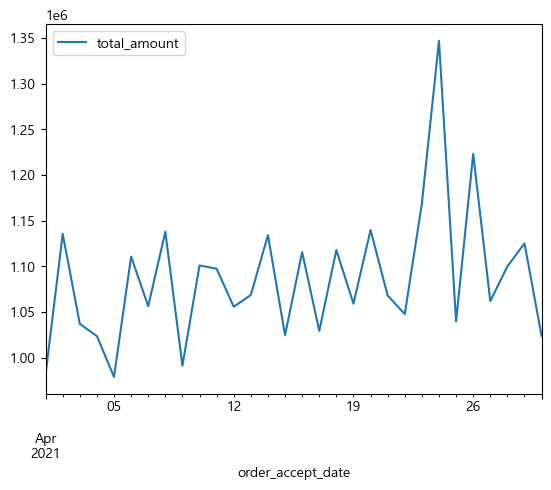

In [18]:
dropdown2 = Dropdown(options = store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)

In [25]:
from ipywidgets import SelectMultiple

def order_by_multi(val) :
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'].isin(val['new'])) & (order_data['status'].isin([1,2]))]
    display(pick_data.head())
    

In [ ]:
# 여러매장 상세 표시
select = SelectMultiple(options=store_list)
select.observe(order_by_multi, names='value')

display(select)

SelectMultiple(index=(2,), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로점', '청계청로점', '노해로점', '당산로점', '남부순환…

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
348,86786966,3,C53542553,30,41286765,2021-04-01 11:26,2021-04-01 12:02,0,19000,2,무교로점,SL,서울,서울,delivery,배달완료
449,96550218,3,C75719805,85,34901884,2021-04-01 11:33,2021-04-01 12:05,0,29870,2,무교로점,SL,서울,서울,delivery,배달완료
777,70396651,3,C91220594,49,68701272,2021-04-01 12:02,2021-04-01 12:31,0,9390,2,무교로점,SL,서울,서울,delivery,배달완료
1742,61006877,3,C99637930,42,96913554,2021-04-01 13:29,2021-04-01 13:46,0,19270,2,무교로점,SL,서울,서울,delivery,배달완료
2079,70079672,3,C82802183,59,33211006,2021-04-01 13:58,2021-04-01 14:24,1,18820,1,무교로점,SL,서울,서울,takeout,결제완료


In [ ]:
def gragh_by_multi(val) :
    clear_output()
    display(select2)
    
    fig = plt.figure(figsize=(17,4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)
    
    i = 0
    for trg in val['new'] :
        pick_data = order_data[
            (order_data['store_name'] == trg) & 
            (order_data['status'].isin([1,2]))
            ]
        temp = pick_data[['order_accept_date', 'total_amount', 'store_name']].copy()
        temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date', inplace=True)
        i += 1
        # 여러개의 작은 그래프 영역을 만들기 위함
        # add_subplot(nrows, ncols, index) 
        # nrows : 전체 행수, ncols : 전체 열의 수, index : 몇 번째 subplot
        ax = fig.add_subplot(1, len(val['new']), i)
        ax.plot(temp.resample('D').sum().index, 
                temp.resample('D').sum()['total_amount'])
        ax.set_title(trg)
    

SelectMultiple(description='매장 선택 : ', index=(1, 3, 13, 22), options=('삼일대로점', '세종대로점', '무교로점', '덕수궁길점', '서소문로…

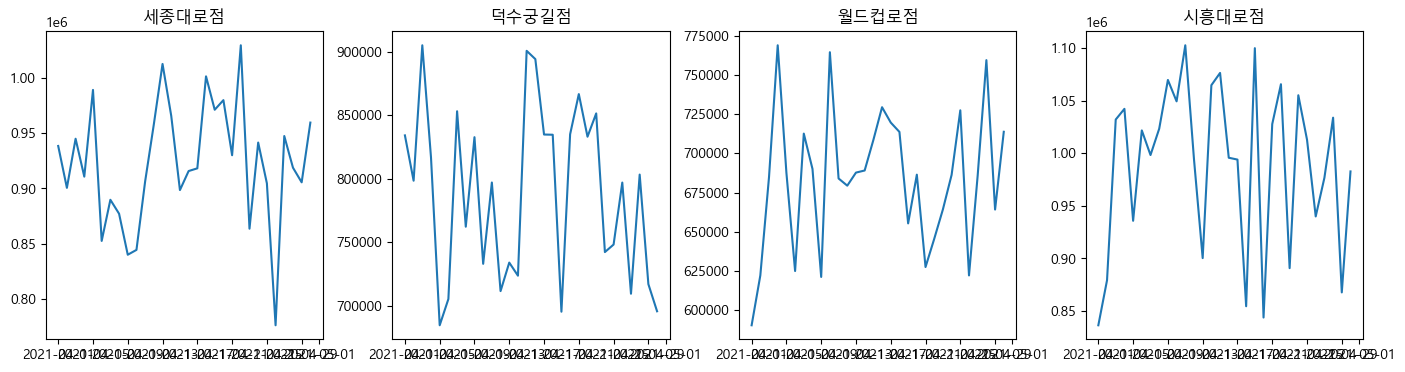

In [38]:
select2 = SelectMultiple(options=store_list, description = '매장 선택 : ')
select2.observe(gragh_by_multi, names='value')
display(select2)

In [61]:
from ipywidgets import IntSlider

def store_lower(val) : 
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    size_data = temp.size()
    print(val)
    print(size_data[size_data < val['new']])


In [ ]:
    
slider = IntSlider(value=1100, min=1000, max=2000, step=100, description='건수 : ',)
slider.observe(store_lower, names="value")
display(slider)

IntSlider(value=1200, description='건수 : ', max=2000, min=1000, step=100)

In [67]:
def store_upper(val):
    clear_output()
    display(slider2)
    temp = order_data.groupby('store_name')
    temp_size = temp.size()
    print(temp_size[temp_size >= val['new']])


In [ ]:

slider2 = IntSlider(value=1600, min=1000, max=2000, step=100, description='건수 :',)
slider2.observe(store_upper, names="value")
display(slider2)

IntSlider(value=1800, description='건수 :', max=2000, min=1000, step=100)

In [72]:
area_list = m_area['wide_area'].unique()

def order_by_area(val) :
    clear_output()
    display(toggle)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) &
                                (order_data['status'].isin([1,2]))]
    display(pick_data.head())

In [73]:
from ipywidgets import ToggleButtons

toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area, names="value")
display(toggle)

ToggleButtons(options=('서울', '부산', '대전', '광주', '세종', '경기'), value='서울')

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL,서울,서울,takeout,결제완료
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL,서울,서울,delivery,배달완료
7,10290387,30,C17281363,75,81945254,2021-04-01 11:00,2021-04-01 11:16,1,22380,1,마들로점,SL,서울,서울,takeout,결제완료
8,54821099,9,C16681192,90,9773815,2021-04-01 11:00,2021-04-01 11:35,0,23080,2,남부순환로점,SL,서울,서울,delivery,배달완료
10,71238056,79,C81534225,30,18403035,2021-04-01 11:00,2021-04-01 11:16,0,38650,2,종로2점,SL,서울,서울,delivery,배달완료


In [76]:
def graph_by_area(val) :
    clear_output()
    display(toggle2)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) &
                                (order_data['status'].isin([1,2]))]
    
    temp = pick_data[['order_accept_date', 'total_amount']].copy()
    temp.loc[:, 'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date',inplace=True)
    temp.resample('D').sum().plot()
    

ToggleButtons(index=3, options=('서울', '부산', '대전', '광주', '세종', '경기'), value='광주')

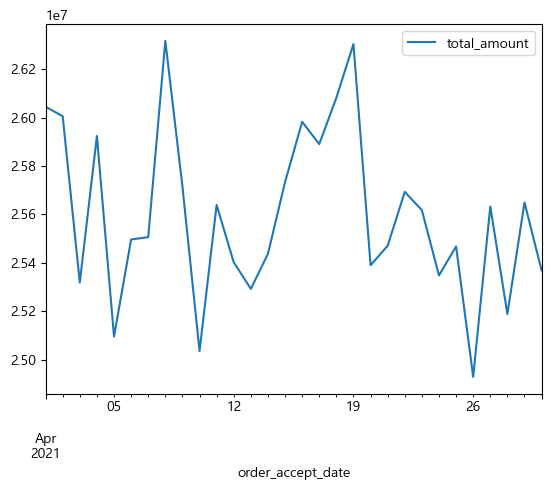

In [ ]:
toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area, names='value')
display(toggle2)

In [95]:
from ipywidgets import DatePicker
import datetime

order_data.loc[:, 'order_date'] = pd.to_datetime(order_data['order_accept_date']).dt.date

def order_by_date(val) :
    clear_output()
    display(date_picker)
    pick_data = order_data.loc[
        (order_data['order_date'] == val['new']) &
        (order_data['status'].isin([1,2]))
    ]
    display(len(pick_data))
    display(pick_data.head())

In [96]:

date_picker = DatePicker(value=datetime.datetime(2021, 4, 1))
date_picker.observe(order_by_date, names="value")
display(date_picker)

DatePicker(value=datetime.date(2021, 4, 14))

6341

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
101120,85372689,183,C00133201,45,78008329,2021-04-14 11:00,2021-04-14 11:28,0,23880,2,금송로점,SJ,세종,세종,delivery,배달완료,2021-04-14
101121,99873778,60,C36374795,57,7074009,2021-04-14 11:00,2021-04-14 11:17,0,31900,2,목공동로2점,SL,서울,서울,delivery,배달완료,2021-04-14
101122,18734120,26,C38767197,0,92680350,2021-04-14 11:00,2021-04-14 11:13,0,27500,2,화곡로점,SL,서울,서울,delivery,배달완료,2021-04-14
101123,77376087,112,C97382186,56,41744429,2021-04-14 11:00,2021-04-14 11:44,0,18820,2,감천항로점,BS,부산,부산,delivery,배달완료,2021-04-14
101124,80293130,8,C82425210,99,51782993,2021-04-14 11:00,2021-04-14 11:32,0,37420,2,당산로점,SL,서울,서울,delivery,배달완료,2021-04-14


In [97]:
min_date = datetime.date(2021, 4, 1)
max_date = datetime.date(2021, 4, 30)

def order_between_date() :
    clear_output()
    display(date_picker_min)
    display(date_picker_max)
    pick_data = order_data.loc[
        (order_data['order_date'] >= min_date) &
        (order_data['order_date'] <= max_date) &
        (order_data['status'].isin([1,2]))]
    display(len(pick_data))
    display(pick_data.head())

In [ ]:
# 가장 이른 날짜 변수에 설정하는 함수 

def set_min_date(val) :
    global min_date
    min_date = val['new']
    order_between_date()

def set_max_date(val) : 
    global max_date
    max_date = val['new']
    order_between_date()
    

date_picker_min = DatePicker(value=min_date)
date_picker_min.observe(set_min_date, names='value')
print("기간 시작")
display(date_picker_min)
date_picker_max = DatePicker(value=max_date)
date_picker_max.observe(set_max_date, names="value")
print("기간 끝")
display(date_picker_max)

DatePicker(value=datetime.date(2021, 5, 25))

DatePicker(value=datetime.date(2021, 5, 30))

0

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date


In [107]:
import glob
import os

current_dir = os.getcwd()
print(current_dir)
tbl_order_file = os.path.join(current_dir, 'data/tbl_order_*.csv')
tbl_order_files = glob.glob(tbl_order_file)
order_all = pd.DataFrame()
for file in tbl_order_files :
    order_tmp = pd.read_csv(file)
    print(f'{file} : {len(order_tmp)}')
    order_all = pd.concat([order_all, order_tmp], ignore_index=True)
    
# 유지 보수용 매장 데이텃 삭제
order_all = order_all.loc[order_all['store_id'] != 990]

order_all = pd.merge(order_all, m_store, on="store_id", how="left")
order_all = pd.merge(order_all, m_area, on="area_cd", how="left")

# 마스터에 없는 코드에 대응한 문자열 설정 
order_all.loc[order_all['takeout_flag'] == 0, 'takeout_name'] = 'delivery'
order_all.loc[order_all['takeout_flag'] == 1, 'takeout_name'] = 'takeout'


order_all.loc[order_all['status'] == 0, 'status_name'] = '주문 접수'
order_all.loc[order_all['status'] == 1, 'status_name'] = '결제 완료'
order_all.loc[order_all['status'] == 2, 'status_name'] = '배달 완료'
order_all.loc[order_all['status'] == 3, 'status_name'] = '주문 취소'


order_all.loc[:, "order_date"] = pd.to_datetime(
    order_all['order_accept_date']).dt.date

order_all.groupby(['store_id', 'customer_id'])["total_amount"].describe()

d:\data_analysis_lab\ML_100
d:\data_analysis_lab\ML_100\data\tbl_order_202104.csv : 233262
d:\data_analysis_lab\ML_100\data\tbl_order_202105.csv : 241142
d:\data_analysis_lab\ML_100\data\tbl_order_202106.csv : 233302


count          mean           std      min      25%  \
store_id customer_id                                                        
1        C00244531     14.0  33195.714286   8602.625462  18820.0  25157.5   
         C00493736      7.0  33181.428571   9225.469145  24710.0  27190.0   
         C01249550      9.0  28896.666667  10423.662984  18570.0  20640.0   
         C02241044      6.0  36538.333333  11844.077704  22520.0  25710.0   
         C02859946      9.0  32165.555556   8582.160438  18570.0  26470.0   
...                     ...           ...           ...      ...      ...   
999      C98965135     12.0  28677.500000   7185.008541  19000.0  23055.0   
         C99065779     18.0  29987.777778   9937.479593   9390.0  23090.0   
         C99196263     17.0  31088.235294   9421.408623  19000.0  24710.0   
         C99428523     13.0  33275.384615  13173.401621   9390.0  24710.0   
         C99813215      8.0  31697.500000  11806.466449   9390.0  26085.0   

                          50%      75%      max  
store_id customer_id                             
1        C00244531    36795.0  39010.0  44620.0  
         C00493736    29870.0  36155.0  51000.0  
         C01249550    26470.0  39000.0  46920.0  
         C02241044    39795.0  46837.5  46920.0  
         C02859946    35860.0  39000.0  39310.0  
...                       ...      ...      ...  
999      C98965135    27500.0  35907.5  39010.0  
         C99065779    30460.0  35690.0  47440.0  
         C99196263    28080.0  35820.0  51000.0  
         C99428523    30500.0  46240.0  51000.0  
         C99813215    34080.0  39347.5  46240.0  

[41602 rows x 8 columns]

In [108]:
summary_df = order_all.loc[order_all['status'].isin([1,2])]
store_summary_df = summary_df.groupby(['store_id'])['total_amount'].sum()
store_summary_df = pd.merge(store_summary_df, m_store, on='store_id', how = 'left')
print("매출 상위")
display(store_summary_df.sort_values('total_amount', ascending=False).head(10))
print("매출 하위")
display(store_summary_df.sort_values('total_amount', ascending=True).head(10))

매출 상위


,store_id,total_amount,store_name,area_cd
47,48,120384690,노해로2점,SL
190,191,118095960,사우중로점,GB
122,123,113134310,송정해변로점,BS
67,68,112799400,천호대로2점,SL
62,63,112211910,녹사평대로2점,SL
126,127,111797560,분포로점,BS
99,100,111248660,온천천로점,BS
43,44,110643570,무교로2점,SL
78,79,110076670,종로2점,SL
172,173,110034720,비아로점,GJ


매출 하위


,store_id,total_amount,store_name,area_cd
100,101,53586580,중동2로점,BS
2,3,56984250,무교로점,SL
75,76,57112800,국제금융로2점,SL
151,152,57119100,대흥로점,DJ
11,12,57884940,봉화산로점,SL
195,196,58966680,석봉로점,GB
185,186,60675020,효원로점,GN
161,162,61621230,상무번영로점,GJ
69,70,62304610,은평로2점,SL
145,146,62967010,용운동점,DJ


In [112]:
cancel_df = pd.DataFrame()
cancel_cnt = order_all.loc[order_all['status'] == 9].groupby(['store_id'])['store_id'].count()
order_cnt = order_all.loc[order_all['status'].isin([1,2,9])].groupby(['store_id'])['store_id'].count()
cancel_rate = (cancel_cnt / order_cnt) * 100 
cancel_df["cancel_rate"] = cancel_rate


In [113]:
cancel_df = pd.merge(cancel_df, m_store, on='store_id', how='left')
print("취소율 낮음")
display(cancel_df.sort_values('cancel_rate', ascending=True).head(10))
print("취소율 높음")
display(cancel_df.sort_values('cancel_rate', ascending=False).head(10))

취소율 낮음


,store_id,cancel_rate,store_name,area_cd
121,122,16.590164,해운대해변로점,BS
119,120,16.595404,청사포로점,BS
130,131,16.626287,둔산로점,DJ
40,41,17.073840,월계로점,SL
152,153,17.110834,내방로점,GJ
33,34,17.150396,성산동점,SL
146,147,17.290026,한남로점,DJ
19,20,17.304297,장승배기로점,SL
68,69,17.320341,올림픽로2점,SL
122,123,17.361261,송정해변로점,BS


취소율 높음


,store_id,cancel_rate,store_name,area_cd
7,8,20.218409,당산로점,SL
138,139,20.086795,한밭대로점,DJ
131,132,19.948335,대전로점,DJ
156,157,19.811321,우치로점,GJ
95,96,19.747546,구덕로점,BS
65,66,19.592697,도봉로2점,SL
9,10,19.592697,성내로점,SL
194,195,19.568966,화중로점,GB
75,76,19.525302,국제금융로2점,SL
176,177,19.483501,필문대로점,GJ


In [115]:
def calc_delta(t) :
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds() / 60

order_all.loc[:, "order_accept_datetime"] = pd.to_datetime(
    order_all['order_accept_date']
)

order_all.loc[:, "delivered_datetime"] = pd.to_datetime(
    order_all['delivered_date']
)

# 컬럼 생성
order_all.loc[:, 'delta'] = order_all[['order_accept_datetime', 
                                       'delivered_datetime']].apply(calc_delta, axis=1)

delivery_df = order_all.loc[(order_all['status'] == 2) & 
                            (order_all['store_id'].isin([8,122]))]
delivery_df.groupby(['store_id'])['delta'].mean()


store_id
8      47.560231
122    20.164304
Name: delta, dtype: float64

In [116]:
temp_cancel = cancel_df.copy()
temp_delivery = order_all.loc[order_all['status'] == 2].groupby(['store_id'])['delta'].mean()
check_df = pd.merge(temp_cancel, temp_delivery, on='store_id', how='left')
check_df.head()

,store_id,cancel_rate,store_name,area_cd,delta
0,1,18.969885,삼일대로점,SL,34.378830
1,2,18.636756,세종대로점,SL,34.719848
2,3,18.555901,무교로점,SL,34.415958
3,4,18.160767,덕수궁길점,SL,34.498651
4,5,18.172100,서소문로점,SL,34.120035


In [117]:
temp_chk = check_df[['cancel_rate','delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.656488
delta,0.656488,1.000000


In [120]:
# 취소율이 높은 매장만
th_high = check_df['cancel_rate'].quantile(0.75)
temp_chk = check_df.loc[(check_df['cancel_rate']) >= th_high]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.773159
delta,0.773159,1.000000


In [121]:
#취소율이 낮은 매장 
th_low = check_df['cancel_rate'].quantile(0.25)
temp_chk = check_df.loc[(check_df['cancel_rate']) >= th_low]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.608453
delta,0.608453,1.000000


In [ ]:
import seaborn as sns

target_store = ''
min_date = datetime.date(2021, 4, 1)
max_date = datetime.date(2021, 4, 30)

In [136]:
# 출력 셀에 이미 표기된 내용을 지우는 역할
def make_board() :
    clear_output()
    display(toggle_db)
    
    # 데이터 작성 
    pick_order_data = order_all.loc[
        (order_all['store_name'] == target_store) &
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) &
        (order_all['status'].isin([1,2]))
    ]
    
    pick_cancel_data = order_all.loc[
        (order_all['store_name'] == target_store) &
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) & 
        (order_all['status'] == 9)
    ]
    
    pick_order_all = order_all.loc[
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) & 
        (order_all['status'].isin([1,2]))
    ]
    
    pick_cancel_all = order_all.loc[
        (order_all['order_date'] >= min_date) &
        (order_all['order_date'] <= max_date) & 
        (order_all['status'] == 9)
    ]
    
    store_o_cnt = len(pick_order_data)
    store_c_cnt = len(pick_order_all['customer_id'].unique())
    store_cancel_rate = (len(pick_cancel_data) / (len(pick_order_data) + len(pick_cancel_data))) * 100
    
    delivery_time = pick_order_data.loc[pick_order_data['status'] == 2]['delta'].mean()
    delivery_time_all = pick_order_all.loc[pick_order_all['status'] ==2 ]['delta'].mean()
    
    # 화면 그리기 처리 
    temp = pick_order_data[['order_date', 'total_amount']].copy()
    temp.loc[:,'order_date'] = pd.to_datetime(temp['order_date'])
    temp.set_index('order_date', inplace=True)
    
    print("=============================================================")
    str_out = f"**{target_store}** [대상 기간] : {min_date} ~ {max_date}"
    str_out = str_out + f"[데이터 건수] :  {store_o_cnt} 건, " + f"[이용 고객 수] : {store_c_cnt}" 
    
    print(str_out)
    print("=============================================================")
    print("==============일간 매출==================")
    display(temp.resample('D').sum())
    print("=============================================================")
    
    str_out = "[기간매출총액] : {:,}".format(temp['total_amount'].sum())
    str_out = str_out + f"[주문취소총액] : " + "{:,}".format(pick_cancel_data['total_amount'].sum())
    str_out = str_out + f"[주문취소율] : " + f"{round(store_cancel_rate,2)} % "
    print(str_out)
    str_out = f"[평균 배달 시간] : {round(delivery_time, 2)} 분"
    str_out = str_out + f"[전 매장 평균 배달 시간] : " + f"{round(delivery_time_all, 2)} 분"
    print(str_out)
    print("=============================================================")
    
    # 그래프 작성
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    sns.histplot(temp.resample('D').sum(), ax=ax1, kde=False)
    ax1.set_title(f"매출 일 단위 히스토그램")
    
    sns.countplot(x='order_date', data=pick_order_data, ax=ax2)
    ax2.set_title(f"주문 취소 수 일단위")
    
    fig, (ax3) = plt.subplots(1,1, figsize=(20,5))
    sns.boxenplot(x="order_date", y="total_amount", data=pick_order_data)
    ax3.set_title("주문 상황 상자 수염도")
    plt.show()

In [ ]:
# 캘린더 변경시 처리 
def change_date_min(val) :
    global min_date
    min_date = val['new']
    make_board()
    
def change_date_max(val) :
    global max_date  
    max_date = val['new']
    make_board()

In [131]:
def change_dropdown(val) :
    global target_store
    target_store = val['new']
    
    # 기간 지정 가능
    date_picker_min = DatePicker(value=min_date)
    date_picker_min.observe(change_date_min, names="value")
    print("기간")
    date_picker_max = DatePicker(value=max_date)
    date_picker_max.observe(change_date_max, names="value")
    display(date_picker_min, date_picker_max)

In [132]:
def order_by_area(val) :
    clear_output()
    display(toggle_db)
    # 선택ㅇ한 지역의 매장 목록을 만든다
    store_list = order_all.loc[order_all['wide_area'] == val['new']]['store_name'].unique()
    dropdown = Dropdown(options=store_list)
    dropdown.observe(change_dropdown, names="value")
    display(dropdown)

ToggleButtons(options=('서울', '부산', '대전', '광주', '세종', '경기'), value='서울')

,total_amount
order_date,
2021-04-01,1186650
2021-04-02,1146610
2021-04-03,1186000
2021-04-04,1322210
2021-04-05,1057690
2021-04-06,1165920
2021-04-07,1238480
2021-04-08,1132970
2021-04-09,1026100


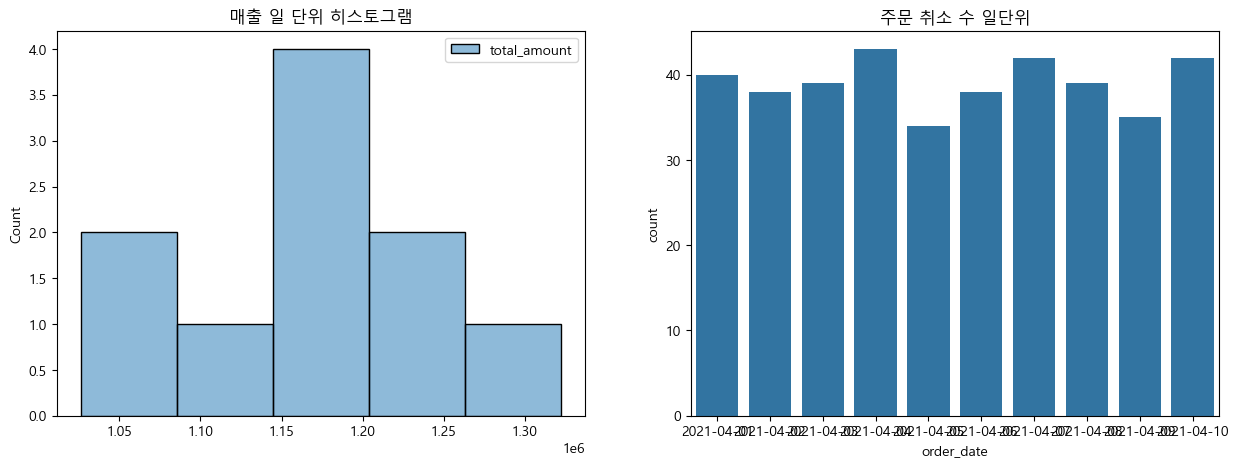

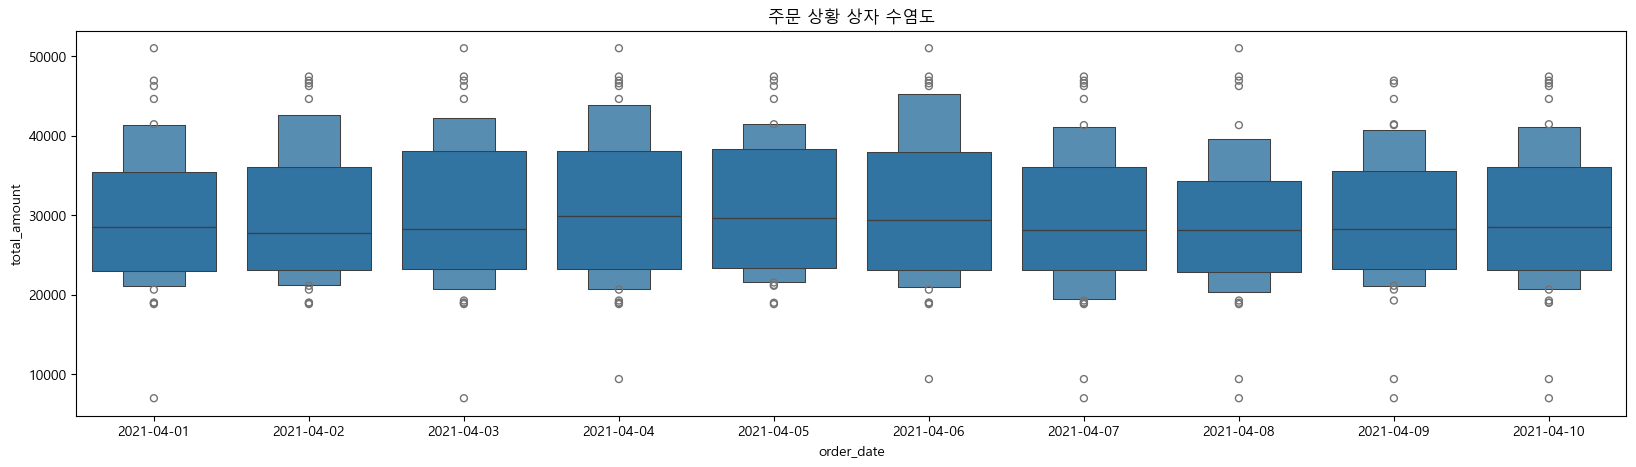

In [137]:
# 토글표시 
toggle_db = ToggleButtons(options=area_list)
toggle_db.observe(order_by_area, names="value")
display(toggle_db)

In [139]:
cal_orders_base = order_all.loc[(order_all['status'].isin([1,2]))]

# 지역순위 (배달 시간)
print("배달 시간 ===================")
print("지역 순위 ===================")

display(pd.DataFrame(cal_orders_base.groupby(['narrow_area'])['delta'].mean().sort_values()))

print("지역별 TOP 5 ===========")

for area in m_area['area_cd'] :
    temp = cal_orders_base.loc[cal_orders_base['area_cd'] == area]
    temp = temp.groupby(['store_id'])['delta'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'delta']]
    display(temp.head())

In [142]:
# 지역 순위 (취소율)
base_df = pd.merge(check_df, m_store, on="area_cd")
base_df = pd.merge(base_df, m_area, on="area_cd")
print("주문취소율 ============")
print("지역순위순 ============")

display(pd.DataFrame(base_df.groupby(['narrow_area'])['cancel_rate'].mean().sort_index()))

print("지역별 TOP 5===============")
for area in m_area['area_cd'] :
    temp = check_df.loc[check_df['area_cd'] == area]
    temp = temp.groupby(['store_id'])['cancel_rate'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'cancel_rate']]
    display(temp.head())

주문취소율 ============
지역순위순 ============


,cancel_rate
narrow_area,
경기남부,18.388690
경기북부,18.572727
광주,18.449330
대전,18.329304
부산,18.231331
서울,18.464508
세종,18.268806


지역별 TOP 5===============


,store_name,cancel_rate
0,월계로점,17.073840
1,성산동점,17.150396
2,장승배기로점,17.304297
3,올림픽로2점,17.320341
4,도봉로점,17.425432


,store_name,cancel_rate
0,해운대해변로점,16.590164
1,청사포로점,16.595404
2,송정해변로점,17.361261
3,중앙대로점,17.451169
4,마린시티1로점,17.604618


,store_name,cancel_rate
0,둔산로점,16.626287
1,한남로점,17.290026
2,복수서로점,17.418874
3,신갈마로점,17.547387
4,용운동점,17.697063


,store_name,cancel_rate
0,내방로점,17.110834
1,장동로점,17.485598
2,용아로점,17.560489
3,효덕로점,17.786864
4,상무대로점,17.837674


,store_name,cancel_rate
0,문예회관길점,17.410714
1,조치원점,17.446198
2,금송로점,18.335942
3,세종로점,18.531268
4,절재로점,18.852259


,store_name,cancel_rate
0,효원로점,17.625000
1,영통구점,17.753510
2,처인구점,18.737673
3,기흥점,18.827930
4,성남대로점,18.999339


,store_name,cancel_rate
0,사우중로점,17.853436
1,일산동구점,18.023084
2,부흥로점,18.301793
3,방죽로점,18.838604
4,석봉로점,18.850482
